# Exercise 1 (10 points)

In this exercise, we will practice refactoring concepts in analytics/data science tasks. Consider the following scenario. You're given a dataset of employee information, and you need to transform it to prepare for analysis. The initial function, `transform_employee_data`, does this by:

- Converting salary values to floats.
- Standardizing department names to lowercase.
- Adding a new column called `salary_level` based on salary thresholds.

However, the function is not well-structured or efficient. Your task is to refactor it to improve its design. Here’s the initial, unrefactored code:

```
import pandas as pd

def transform_employee_data(df):
    # Convert salary to float
    for i in range(len(df)):
        df.loc[i, 'salary'] = float(df.loc[i, 'salary'])

    # Standardize department names
    for i in range(len(df)):
        df.loc[i, 'department'] = df.loc[i, 'department'].lower()

    # Add salary level column
    for i in range(len(df)):
        salary = df.loc[i, 'salary']
        if salary < 50000:
            df.loc[i, 'salary_level'] = 'low'
        elif 50000 <= salary < 100000:
            df.loc[i, 'salary_level'] = 'medium'
        else:
            df.loc[i, 'salary_level'] = 'high'

    return df

```

Refactoring instructions:

- **Remove loops**: The function uses loops which can be slow with large datasets. Use `pandas` vectorized operations to improve performance.
- **Simplify conditional**: Replace conditional logic with `pd.cut` for better readability.
- **Rename the function**: Use a more descriptive name.

Then, apply the refactored function to following data:

```
data = {'employee_id': [1, 2, 3],
        'salary': ['48000', '75000', '120000'],
        'department': ['Sales', 'Engineering', 'Marketing']
}
```

The expected outcome is shown below.

| employee_id | salary | department | salary_level |
| --- | --- | --- | --- |
| 1 | 48000.0 | sales | low |
| 2 | 75000.0 | engineering | medium |
| 3 | 120000.0 | marketing | high |



In [6]:
import pandas as pd

def process_employee_data(df):
    # Convert salary to float
    df['salary'] = df['salary'].astype(float)

    # Standardize department names
    df['department'] = df['department'].str.lower()

    # Add salary level column
    df['salary_level'] = pd.cut(df['salary'], bins=[0,50000,100000, float('inf')], labels=['low', 'medium', 'high'])

    return df

data = {'employee_id': [1, 2, 3],
        'salary': ['48000', '75000', '120000'],
        'department': ['Sales', 'Engineering', 'Marketing']
}

df = pd.DataFrame(data)

transformed = process_employee_data(df)
transformed

,employee_id,salary,department,salary_level
0,1,48000.0,sales,low
1,2,75000.0,engineering,medium
2,3,120000.0,marketing,high


# Exercise 2

In this exercise, we will practice `polars` operations.

### Exercise 2(a) (2 points)

Load `polars`, `matplotlib.pyplot` and `seaborn`.

In [7]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

### Exercise 2(b) (2 points)

Read the `diamond.csv` data file and create a data frame called `df`. Report the shape of `df`.

In [9]:
df = pl.read_csv('diamond.csv')
df.head()

Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
f64,str,str,str,str,str,str,i64
1.1,"""Ideal""","""H""","""SI1""","""VG""","""EX""","""GIA""",5169
0.83,"""Ideal""","""H""","""VS1""","""ID""","""ID""","""AGSL""",3470
0.85,"""Ideal""","""H""","""SI1""","""EX""","""EX""","""GIA""",3183
0.91,"""Ideal""","""E""","""SI1""","""VG""","""VG""","""GIA""",4370
0.83,"""Ideal""","""G""","""SI1""","""EX""","""EX""","""GIA""",3171


In [11]:
df.shape

(6000, 8)

### Exercise 2(c) (3 points)

Create the frequency table of `Cut`.

In [ ]:
df['Cut'].value_counts()

Cut,count
str,u32
"""Very Good""",2428
"""Signature-Ideal""",253
"""Fair""",129
"""Ideal""",2482
"""Good""",708


### Exercise 2(d) (3 points)

Report the average `Price` based on `Color`.

In [16]:
df.group_by('Color').agg(pl.col('Price').mean()).sort(by='Price')

Color,Price
str,f64
"""I""",8989.636364
"""H""",10487.347544
"""E""",11539.190231
"""G""",12520.050633
"""F""",12712.241856
"""D""",15255.783661


### Exercise 2(e) (3 points)

Report the average `Price` based on `Cut` and `Color`.

In [19]:
df.group_by(['Color', 'Cut']).agg(pl.col('Price').mean()).sort(by='Price')

Color,Cut,Price
str,str,f64
"""I""","""Fair""",4573.1875
"""E""","""Fair""",5370.625
"""H""","""Fair""",5908.5
"""D""","""Fair""",6058.25
"""F""","""Fair""",6063.625
…,…,…
"""F""","""Signature-Ideal""",13247.947368
"""G""","""Ideal""",13570.310145
"""F""","""Ideal""",14729.426997


### Exercise 2(f) (3 points)

Compute the correlation between `Carat Weight` and `Price`. 

In [20]:
df[['Carat Weight', 'Price']].corr()

Carat Weight,Price
f64,f64
1.0,0.858562
0.858562,1.0


### Exercise 2(g) (4 points)

Create a scatter plot between `Carat Weight` and `Price`.

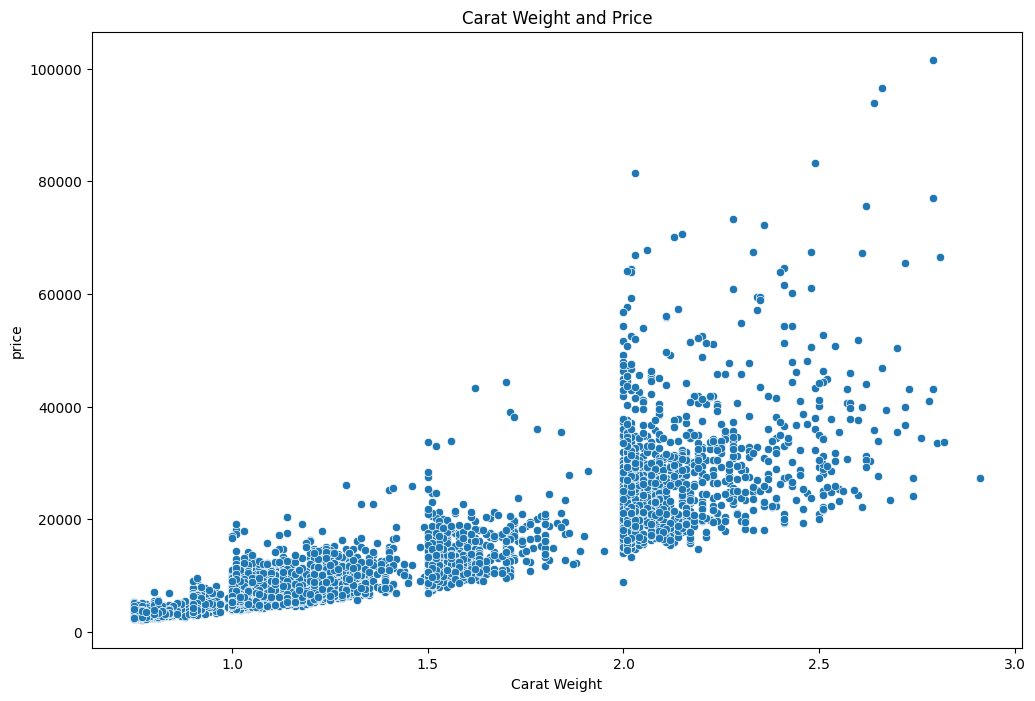

In [24]:
fig, ax = plt.subplots(figsize = (12,8))

sns.scatterplot(x='Carat Weight', y='Price', data=df)
plt.title('Carat Weight and Price')
plt.xlabel('Carat Weight')
plt.ylabel('price')
plt.show()